In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('mushroom.csv')

In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (2000, 26)


In [9]:
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [13]:
print("\nClass distribution:")
print(df['class'].value_counts())


Class distribution:
poisonous    1400
edible        600
Name: class, dtype: int64


In [15]:
df = df.drop(columns=['Unnamed: 0'])

In [17]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [19]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [21]:
from scipy import stats
z_scores = stats.zscore(df[['stalk_height', 'cap_diameter']])
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"Potential outliers: {outliers.sum()}")

Potential outliers: 0


In [23]:
# Split into features and target
X = df.drop(columns=['class'])
y = df['class']

In [25]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1400, 24)
Testing set shape: (600, 24)


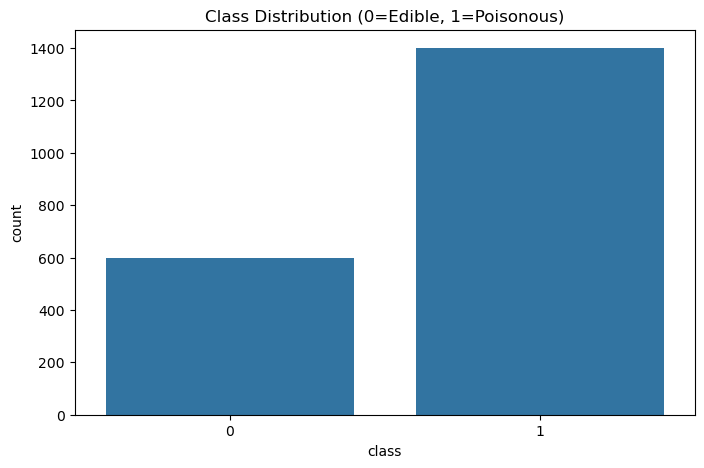

In [29]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Class Distribution (0=Edible, 1=Poisonous)')
plt.show()

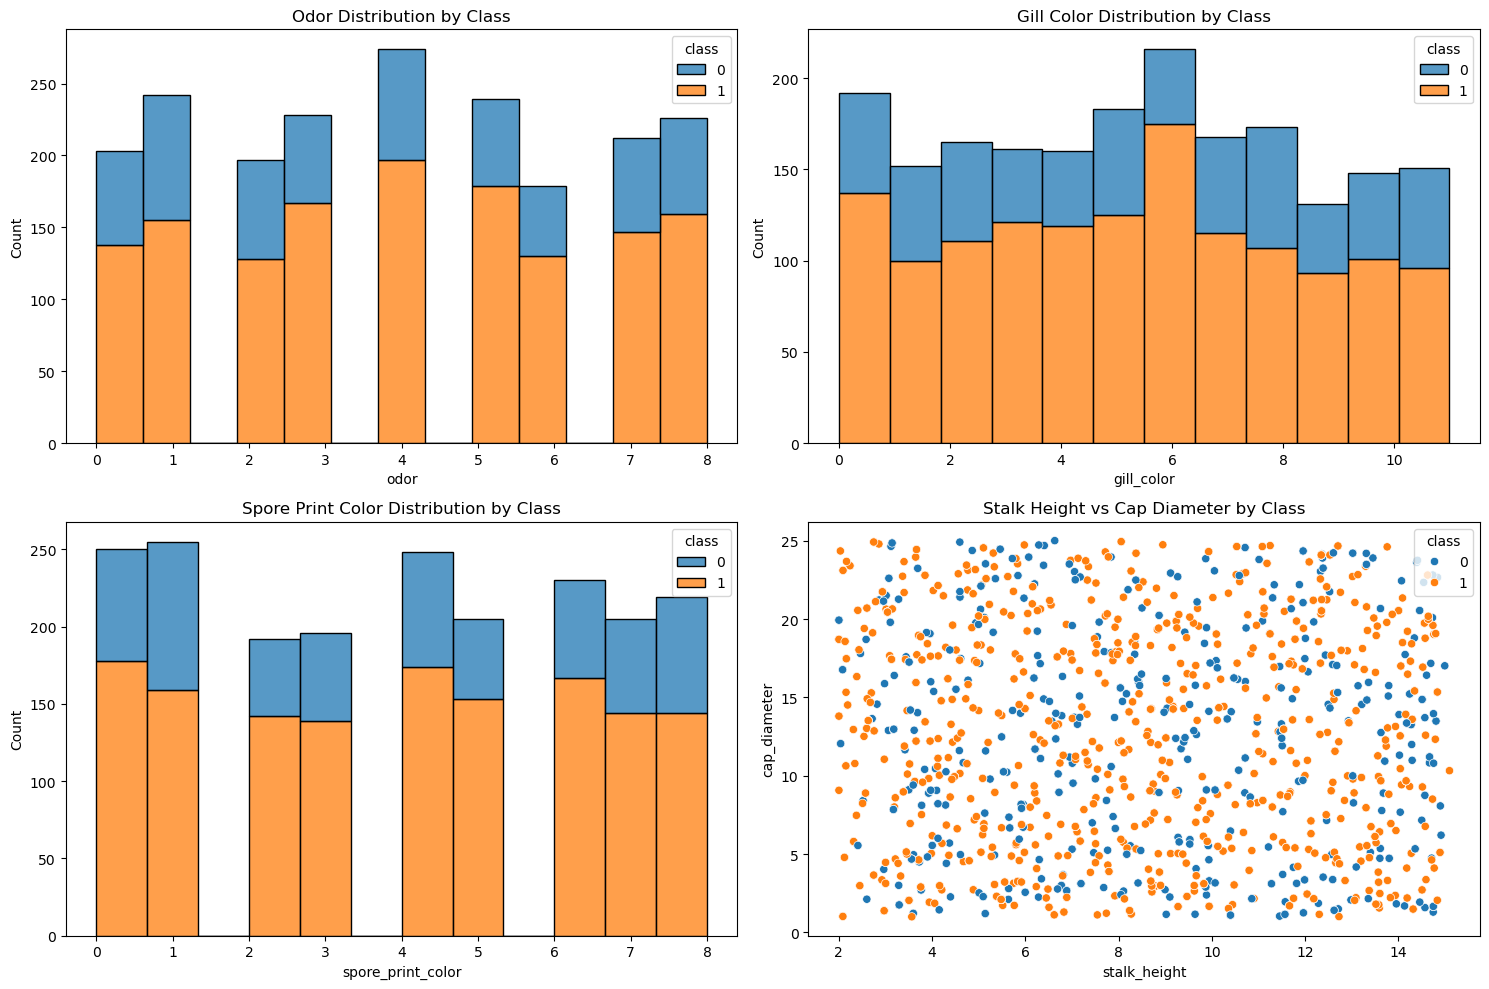

In [47]:
# Visualize feature distributions for a few important features
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='odor', hue='class', multiple='stack')
plt.title('Odor Distribution by Class')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='gill_color', hue='class', multiple='stack')
plt.title('Gill Color Distribution by Class')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='spore_print_color', hue='class', multiple='stack')
plt.title('Spore Print Color Distribution by Class')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='stalk_height', y='cap_diameter', hue='class')
plt.title('Stalk Height vs Cap Diameter by Class')
plt.tight_layout()
plt.show()


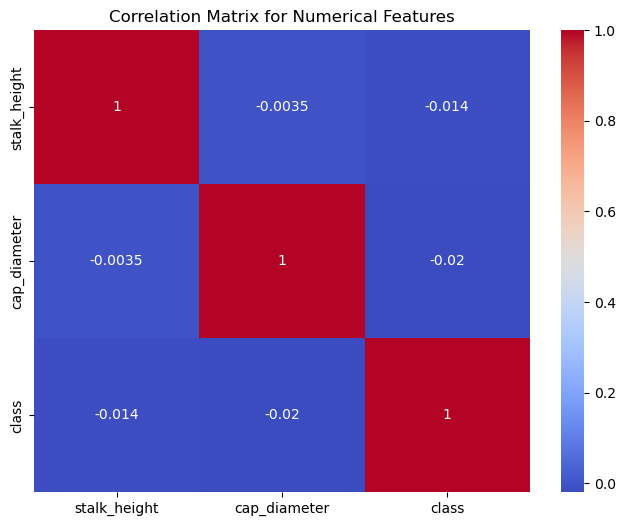

In [49]:
# Correlation matrix for numerical features
num_features = ['stalk_height', 'cap_diameter']
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_features + ['class']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [51]:
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [53]:
# Train the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [54]:
# Make predictions
y_pred = svm_classifier.predict(X_test)

In [55]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6916666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       185
           1       0.69      1.00      0.82       415

    accuracy                           0.69       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.48      0.69      0.57       600


Confusion Matrix:
[[  0 185]
 [  0 415]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
# Since we have many features, we'll visualize in 2D using PCA
from sklearn.decomposition import PCA

In [61]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

In [65]:
# Create a mesh grid for decision boundary
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


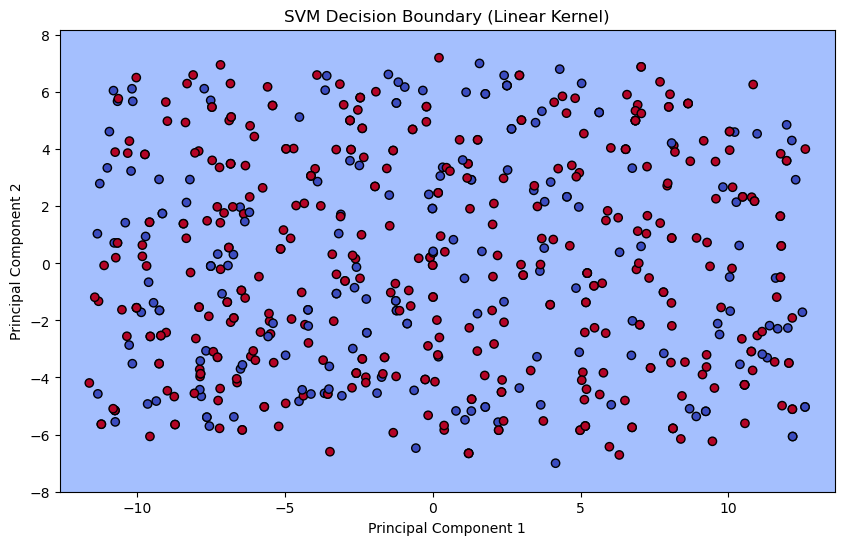

In [67]:
plot_decision_boundary(X_pca, y_test, svm_classifier, 'SVM Decision Boundary (Linear Kernel)')

In [69]:
from sklearn.model_selection import GridSearchCV

In [71]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [73]:
# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.5s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [75]:
# Best parameters and model
print("\nBest parameters:", grid.best_params_)
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)


Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [77]:
# Evaluate best model
print("\nBest model accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest model classification report:")
print(classification_report(y_test, y_pred_best))


Best model accuracy: 0.8816666666666667

Best model classification report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76       185
           1       0.85      1.00      0.92       415

    accuracy                           0.88       600
   macro avg       0.93      0.81      0.84       600
weighted avg       0.90      0.88      0.87       600



In [79]:
# Compare different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_results = []

In [81]:
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    kernel_results.append(acc)
    print(f"{kernel} kernel accuracy: {acc:.4f}")

linear kernel accuracy: 0.6917
poly kernel accuracy: 0.7183
rbf kernel accuracy: 0.6917
sigmoid kernel accuracy: 0.6167


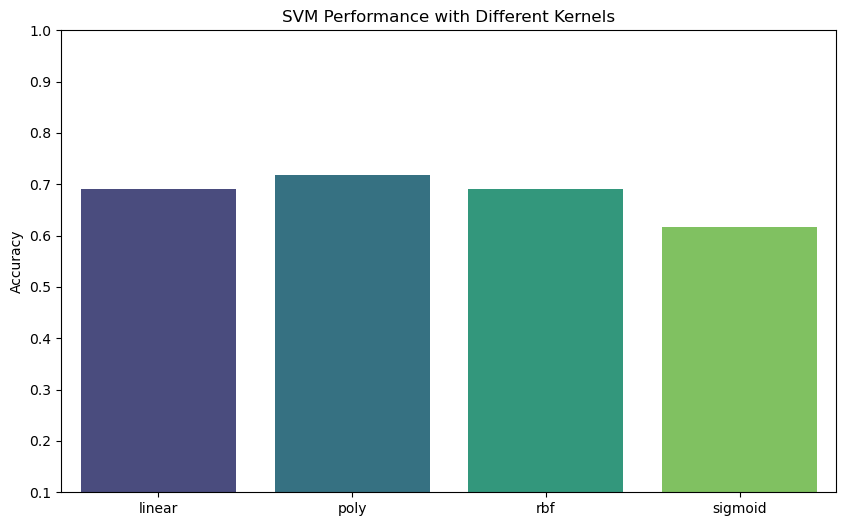

In [95]:
# Plot kernel comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=kernels, y=kernel_results, palette="viridis",hue=kernels)
plt.title('SVM Performance with Different Kernels')
plt.ylabel('Accuracy')
plt.ylim(0.1, 1.0)
plt.show()